# 06_03: Name popularity

In [3]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
allyears = pd.read_feather('allyears.feather')
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31677,Zyell,M,5,2023
31678,Zyen,M,5,2023
31679,Zymirr,M,5,2023
31680,Zyquan,M,5,2023


In [ ]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed

number
name    sex year        
Aaban   M   2007       5
            2009       6
            2010       9
            2011      11
            2012      11
...                  ...
Zyvon   M   2015       7
Zyyanna F   2010       6
Zyyon   M   2014       6
Zzyzx   M   2010       5
            2018       5

[2117219 rows x 1 columns]

In [4]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2019,2237
2020,2225
2021,2097


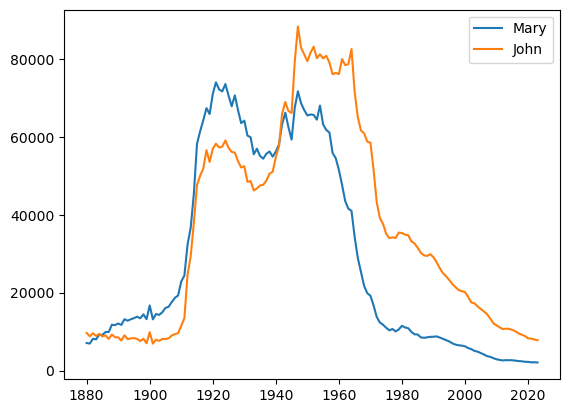

In [5]:
plt.plot(allyears_indexed.loc[('F','Mary'), 'number'], label='Mary')
plt.plot(allyears_indexed.loc[('M','John'), 'number'], label='John')
plt.legend()

In [6]:
births = allyears.groupby(['sex','year']).number.sum()
births

sex  year
F    1880      90994
     1881      91953
     1882     107847
     1883     112320
     1884     129019
              ...   
M    2019    1792223
     2020    1723649
     2021    1746499
     2022    1741954
     2023    1701224
Name: number, Length: 288, dtype: int64[pyarrow]

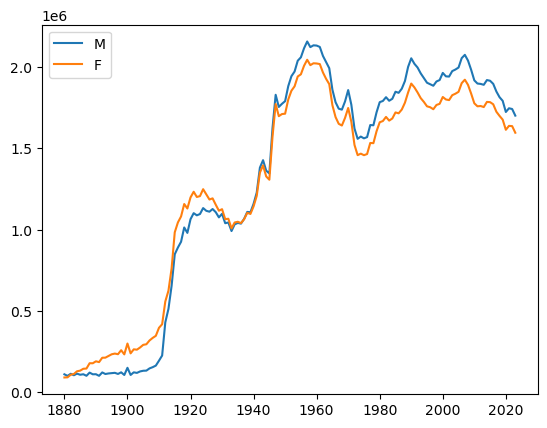

In [7]:
plt.plot(births.loc['M'], label='M')
plt.plot(births.loc['F'], label='F')
plt.legend()

In [8]:
allyears_indexed['fraction'] = allyears_indexed.number / births

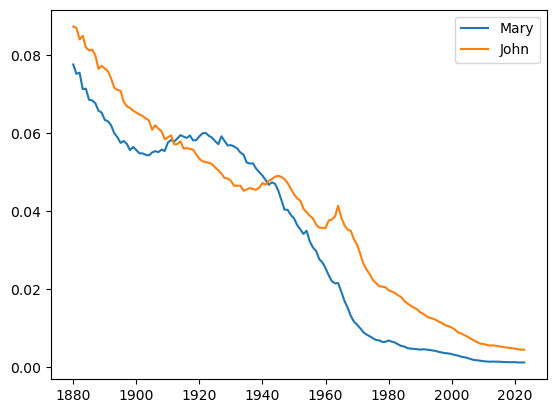

In [9]:
plt.plot(allyears_indexed.loc[('F','Mary'), 'fraction'], label='Mary')
plt.plot(allyears_indexed.loc[('M','John'), 'fraction'], label='John')
plt.legend()

In [10]:
def plotname(sex, name, relative=False):
    data = allyears_indexed.loc[(sex, name), 'fraction' if relative else 'number']
    
    plt.plot(data.index, data.values, label=name)
    plt.axis(xmin=1880, xmax=2023)

In [11]:
def comparenames(sex, names, relative=False):
    for name in names:
        plotname(sex, name, relative)

    plt.legend()

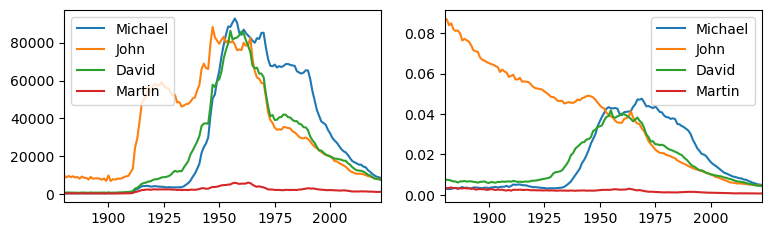

In [12]:
plt.figure(figsize=(9,2.5))
plt.subplot(1,2,1); comparenames('M', ['Michael','John','David','Martin'])
plt.subplot(1,2,2); comparenames('M', ['Michael','John','David','Martin'], relative=True)

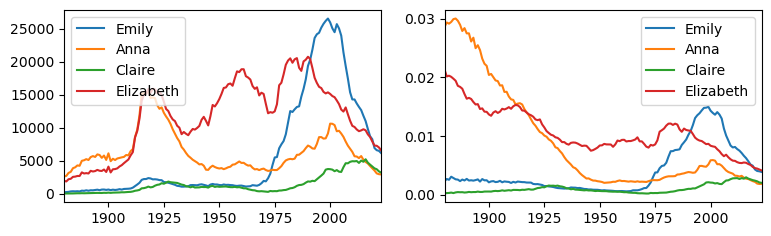

In [13]:
plt.figure(figsize=(9,2.5))
plt.subplot(1,2,1); comparenames('F', ['Emily','Anna','Claire','Elizabeth'])
plt.subplot(1,2,2); comparenames('F', ['Emily','Anna','Claire','Elizabeth'], relative=True)

In [14]:
claires = ['Claire', 'Clare', 'Clara', 'Chiara', 'Ciara']

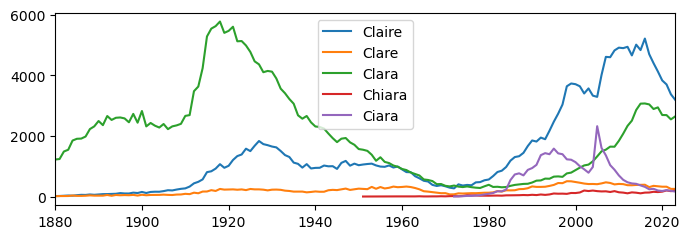

In [15]:
plt.figure(figsize=(8,2.5))
comparenames('F', claires)

In [16]:
allyears_indexed.loc[('F', claires), 'number']

sex  name    year
F    Claire  1880     21
             1881     23
             1882     30
             1883     38
             1884     33
                    ... 
     Ciara   2019    204
             2020    188
             2021    215
             2022    192
             2023    169
Name: number, Length: 547, dtype: int64[pyarrow]

In [17]:
allyears_indexed.loc[('F', claires), 'number'].unstack(level=2)

year        1880  1881  1882  1883  1884  1885  1886  1887  1888  1889  ...  \
sex name                                                                ...   
F   Claire    21    23    30    38    33    49    61    58    73    62  ...   
    Clare     15    20    21    22    38    27    26    31    43    34  ...   
    Clara   1226  1242  1490  1548  1852  1910  1916  1984  2230  2319  ...   
    Chiara  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...   
    Ciara   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...   

year        2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
sex name                                                                
F   Claire  5015  4836  5216  4701  4404  4130  3835  3702  3379  3195  
    Clare    387   389   394   315   357   344   329   329   257   257  
    Clara   2860  3069  3075  3044  2892  2946  2694  2691  2550  2648  
    Chiara   131   111   134   137   161   152   166   206   182   200  
    Ciara    424   372   324   244   259   204   188   215   192   169  

[5 rows x 144 columns]

In [18]:
allyears_indexed.loc[('F', claires), 'number'].unstack(level=1)

name      Claire  Clare  Clara  Chiara  Ciara
sex year                                     
F   1880      21     15   1226    <NA>   <NA>
    1881      23     20   1242    <NA>   <NA>
    1882      30     21   1490    <NA>   <NA>
    1883      38     22   1548    <NA>   <NA>
    1884      33     38   1852    <NA>   <NA>
...          ...    ...    ...     ...    ...
    2019    4130    344   2946     152    204
    2020    3835    329   2694     166    188
    2021    3702    329   2691     206    215
    2022    3379    257   2550     182    192
    2023    3195    257   2648     200    169

[144 rows x 5 columns]

In [19]:
allyears_indexed.loc[('F', claires), 'number'].unstack(level=1).stack()

sex  year  name  
F    1880  Claire      21
           Clare       15
           Clara     1226
     1881  Claire      23
           Clare       20
                     ... 
     2023  Claire    3195
           Clare      257
           Clara     2648
           Chiara     200
           Ciara      169
Length: 547, dtype: int64[pyarrow]

In [21]:
unstacked = allyears_indexed.loc[('F', claires), 'number'] \
                            .unstack(level=2) \
                            .droplevel(level=0) \
                            .fillna(0)
unstacked

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
name,,,,,,,,,,,,,,,,,,,,,
Claire,21,23,30,38,33,49,61,58,73,62,...,5015,4836,5216,4701,4404,4130,3835,3702,3379,3195
Clare,15,20,21,22,38,27,26,31,43,34,...,387,389,394,315,357,344,329,329,257,257
Clara,1226,1242,1490,1548,1852,1910,1916,1984,2230,2319,...,2860,3069,3075,3044,2892,2946,2694,2691,2550,2648
Chiara,0,0,0,0,0,0,0,0,0,0,...,131,111,134,137,161,152,166,206,182,200
Ciara,0,0,0,0,0,0,0,0,0,0,...,424,372,324,244,259,204,188,215,192,169


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

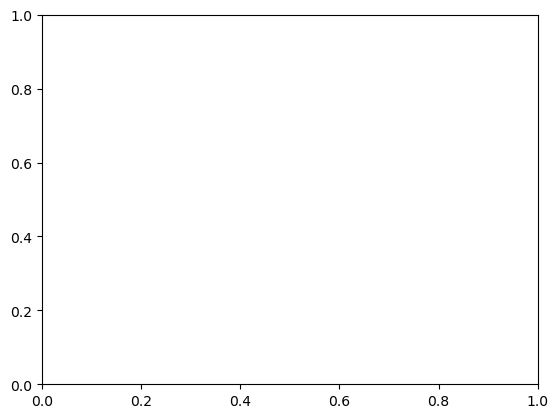

In [22]:
plt.stackplot(unstacked.columns, unstacked)

(np.float64(1880.0), np.float64(2024.0), np.float64(0.0), np.float64(9600.15))

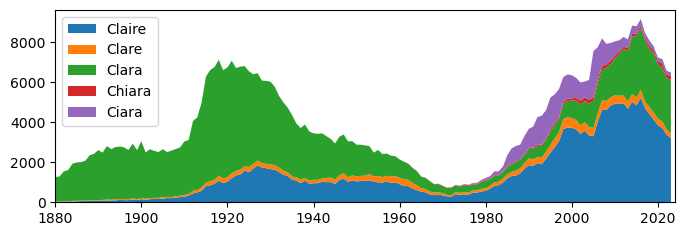

In [23]:
plt.figure(figsize=(8,2.5))
plt.stackplot(unstacked.columns, unstacked.astype(np.int32))
plt.legend(unstacked.index, loc='upper left')
plt.axis(xmin=1880, xmax=2024)

(np.float64(1880.0), np.float64(2024.0), np.float64(0.0), np.float64(9600.15))

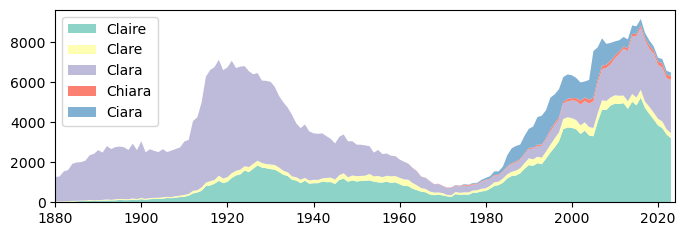

In [24]:
plt.figure(figsize=(8,2.5))
plt.stackplot(unstacked.columns, unstacked.astype(np.int32),
             colors=plt.get_cmap('Set3')(range(5))) # get the first five colors from the "Set3" matplotlib colormap  
plt.legend(unstacked.index, loc='upper left')
plt.axis(xmin=1880, xmax=2024)